[License Plate Recognition using OpenCV, YOLO and Keras](https://medium.com/@theophilebuyssens/license-plate-recognition-using-opencv-yolo-and-keras-f5bfe03afc65)

[Source Repo](https://github.com/TheophileBuy/LicensePlateRecognition)  
Link to dataset is in the repo's readme.

# Preparation

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


In [2]:
%pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.4.1


In [3]:
%pip install tensorflow-gpu==1.15.0rc2

     |████████████████████████████████| 411.5MB 43kB/s 
     |████████████████████████████████| 3.8MB 40.1MB/s 
     |████████████████████████████████| 512kB 49.4MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=53e7cd8cf3add3601ed89ce8737c3142dbd3d85fd89f59abd01f99ad6acf5949
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [4]:
!git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2713, done.
remote: Total 2713 (delta 0), reused 0 (delta 0), pack-reused 2713
Receiving objects: 100% (2713/2713), 32.98 MiB | 47.49 MiB/s, done.
Resolving deltas: 100% (1762/1762), done.


In [5]:
%cd darkflow
%pip install .

/content/darkflow
Processing /content/darkflow
  Created wheel for darkflow: filename=darkflow-1.0.0-cp37-cp37m-linux_x86_64.whl size=813111 sha256=45d5afadeb7177b0c75938b807fcdf87a810ea1895a67891102f3eb8e7cafe5e
  Stored in directory: /tmp/pip-ephem-wheel-cache-vaz2_wjz/wheels/2f/3a/c5/e84e79d73d5a73aa1b5129a66a40947d9d77a32ebed501e431
Successfully built darkflow


In [6]:
!python setup.py build_ext --inplace

setup.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
Compiling darkflow/cython_utils/nms.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo2_findboxes.pyx because it changed.
Compiling darkflow/cython_utils/cy_yolo_findboxes.pyx because it changed.
[1/3] Cythonizing darkflow/cython_utils/cy_yolo2_findboxes.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow/darkflow/cython_utils/cy_yolo2_findboxes.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/3] Cythonizing darkflow/cython_utils/cy_yolo_findboxes.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/darkflow

Before everything, 

*   Get the yolo-human.cfg file and change the configuration to training
*   Edit Labels.txt
*   Create the ckpt folder
*   Create a new yolo.weight or use the existing one


In [7]:
import os

# Upload yolo.weights, pre-trained weights file (for YOLO v2) from an external Google drive 
weights = 'yolo'
weights_file = weights + '.weights'
if not os.path.exists('weights_file'):
  !gdown --id 0B1tW_VtY7oniTnBYYWdqSHNGSUU
  !mkdir bin
  !mv yolo.weights bin

Downloading...
From: https://drive.google.com/uc?id=0B1tW_VtY7oniTnBYYWdqSHNGSUU
To: /content/darkflow/yolo.weights
204MB [00:03, 52.7MB/s]


# Training

In [8]:
import numpy as np
from darkflow.net.build import TFNet
import cv2
options = {"model": "/content/darkflow/cfg/yolo-human.cfg",
           "load": "/content/darkflow/bin/yolo.weights",
           "batch": 8,
           "epoch": 100,
           "gpu": 0.9,
           "train": True,
           "annotation": "../gdrive/MyDrive/human_detection/annotations/",
           "dataset": "../gdrive/MyDrive/human_detection/training_set/"}
tfnet = TFNet(options)
tfnet.train()
tfnet.savepb()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


Parsing ./cfg/yolo.cfg
Parsing /content/darkflow/cfg/yolo-human.cfg
Loading /content/darkflow/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.017390966415405273s

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  

meta and pb file can be found from directory build-graph.

# Testing

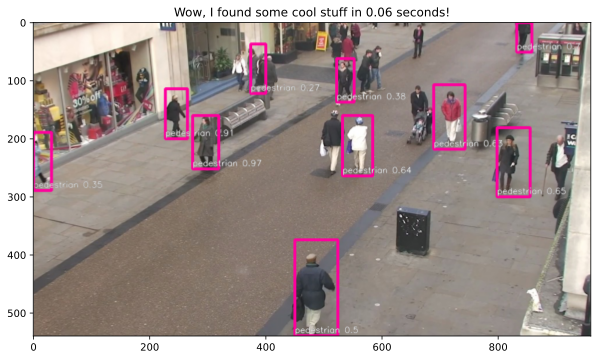

In [14]:
import time
import urllib
import pandas as pd
import imageio
threshold = 0.25

# For drawing onto and plotting images
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# For uploading an image from url
# Modified from https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/
def url_to_image(url):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image
  
# For drawing bounding boxes around detected objects on image
def boxing(image, predictions):
    newImage = np.copy(image)
    im_height, im_width, im_depth = image.shape  
    global labels
    labels = []
    for result in predictions:
      # Only show boxes that are above confidence threshold
      confidence = result['confidence']
      if confidence > threshold:
        xmin = result['topleft']['x']
        ymin = result['topleft']['y']
        xmax = result['bottomright']['x']
        ymax = result['bottomright']['y']
        #global label
        label = result['label'] + " " + str(round(confidence, 2))
        labels.append(label)
        # Draw boxes on image
        fontScale = max(im_width,im_height)/2000
        fontThickness = int(max(im_width,im_height)/1000)
        newImage = cv2.rectangle(newImage, (xmin, ymax), (xmax, ymin), (255, 0, 157), 3)
        newImage = cv2.putText(newImage, label, (xmin, ymax-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0, 0, 0), fontThickness*2, cv2.LINE_AA) 
        newImage = cv2.putText(newImage, label, (xmin, ymax-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (255, 255, 255), fontThickness, cv2.LINE_AA)  
    return newImage


# Insert your URL here
# url = ""

# Read in image from URL
# image = url_to_image(url)

# ------------------------------------------------------------------------------

# Insert your filename at line 3
inpath = '/content/gdrive/MyDrive/human_detection/test_set/'
filename = '7501.jpg'

# Set confidence threshold for detection
# Optional: You can adjust this value (0-1) to see more or less detected objects in the image
threshold = 0.25

# Read in image from file
fpath = inpath + filename
image = imageio.imread(fpath, pilmode='RGB')

# Use YOLO for object detection  
# Record inference time
start_time = time.time()
result = tfnet.return_predict(image)
end_time = time.time()

# Plot and show detection boxes on images
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(boxing(image, result))
# Add titles to plot
if result and labels:
  plt.title('Wow, I found some cool stuff in {} seconds!'.format(format(end_time-start_time, '.2f')))
else:
  plt.title("Detection: 0")